# 项目：指导四轴飞行器学会飞行

设计一个能够使四轴飞行器飞行的智能体，然后使用你选择的强化学习算法训练它！

请尝试运用你在这一单元中学到的知识，看看哪个方法效果最好，当然你也可以自己想出创新型方法并测试它们。
## 说明

请查看目录下的文件，以更好地了解项目结构。 

- `task.py`：在本文件中定义你的任务（环境）。
- `agents/`：本文件夹中包含强化学习智能体。
    - `policy_search.py`：我们为你提供了一个智能体模板。
    - `agent.py`：在本文件中开发你的智能体。
- `physics_sim.py`：本文件中包含四轴飞行器模拟器。**请勿修改本文件**。

在本项目中，你需要在 `task.py` 中定义你的任务。尽管我们为你提供了一个任务示例，来帮助你开始项目，但你也可以随意更改这个文件。在这个 notebook 中，你还将学习更多有关修改这个文件的知识。

你还需要在 `agent.py` 中设计一个强化学习智能体，来完成你选择的任务。

我们也鼓励你创建其他文件，来帮助你整理代码。比如，你也许可以通过定义一个 `model.py` 文件来定义其他你需要的神经网络结构。

## 控制四轴飞行器

在下方的代码中，我们提供了一个智能体示例，来示范如何使用模拟器来控制四轴飞行器。这个智能体比你在 notebook 中需要测试的智能体（在 `agents/policy_search.py` 中）更加简单！

这个智能体通过设置飞行器四个轴上的转速来控制飞行器。`Basic_Agent` 类中提供的智能体将会随机为四个轴指定动作。这四个速度将通过 `act` 方法以四个浮点数列表的形式返回。


在本项目中，你将在 `agents/agent.py` 中实现的智能体会以更加智能的方法进行指定的动作。

### plot

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_run(results, standalone=True):
    if standalone:
        plt.subplots(figsize=(15, 15))
    
    #查看四轴飞行器的位置变化
    plt.subplot(3, 3, 1)
    plt.title('Position')
    plt.plot(results['time'], results['x'], label='x')
    plt.plot(results['time'], results['y'], label='y')
    plt.plot(results['time'], results['z'], label='z')
    plt.xlabel('time, seconds')
    plt.ylabel('Position')
    plt.grid(True)
    if standalone:
        plt.legend()

    #四轴飞行器的速度
    plt.subplot(3, 3, 2)
    plt.title('Velocity')
    plt.plot(results['time'], results['x_velocity'], label='x_hat')
    plt.plot(results['time'], results['y_velocity'], label='y_hat')
    plt.plot(results['time'], results['z_velocity'], label='z_hat')
    plt.xlabel('time, seconds')
    plt.ylabel('Velocity')
    plt.grid(True)
    if standalone:
        plt.legend()
    
    #绘制欧拉角 (Euler angles)（四轴飞行器围绕 x，y 和 z 轴的旋转）的图表
    plt.subplot(3, 3, 3)
    plt.title('Orientation')
    plt.plot(results['time'], results['phi'], label='phi')
    plt.plot(results['time'], results['theta'], label='theta')
    plt.plot(results['time'], results['psi'], label='psi')
    plt.xlabel('time, seconds')
    plt.grid(True)
    if standalone:
        plt.legend()
    
    #绘制每个欧拉角的速度（每秒的弧度）图
    plt.subplot(3, 3, 4)
    plt.title('Angular Velocity')
    plt.plot(results['time'], results['phi_velocity'], label='phi')
    plt.plot(results['time'], results['theta_velocity'], label='theta')
    plt.plot(results['time'], results['psi_velocity'], label='psi')
    plt.xlabel('time, seconds')
    plt.grid(True)
    if standalone:
        plt.legend()

    #最后，你可以使用下方代码来输出智能体选择的动作。
    plt.subplot(3, 3, 5)
    plt.title('Rotor Speed')
    plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1')
    plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2')
    plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3')
    plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4')
    plt.xlabel('time, seconds')
    plt.ylabel('Rotor Speed, revolutions / second')
    plt.grid(True)
    if standalone:
        plt.legend()

    if standalone:
        plt.tight_layout()
        plt.show()

In [2]:
from mpl_toolkits.mplot3d.axes3d import Axes3D


def plot_point3d(ax, x, y, z, **kwargs):
    ax.scatter([x], [y], [z], **kwargs)
    ax.text(x, y, z, "({:.1f}, {:.1f}, {:.1f})".format(x, y, z))


def show_flight_path(results, target=None):
    results = np.array(results)
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')

    ax.plot3D(results[:, 0], results[:, 1], results[:, 2], 'gray')
    
    if target is not None:
        plot_point3d(ax, *target[0:3], c='y', marker='x', s=100, label='target')
        
    plot_point3d(ax, *results[0, 0:3], c='g', marker='o', s=50, label='start')
    plot_point3d(ax, *results[-1, 0:3], c='r', marker='o', s=50, label='end')
    
    ax.legend()

### random Agent

In [3]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

运行下方代码，让智能体指定动作来控制四轴飞行器。

请随意更改我们提供的 `runtime`，`init_pose`，`init_velocities` 和 `init_angle_velocities` 值来更改四轴飞行器的初始条件。

下方的 `labels` 列表为模拟数据的注释。所有的信息都储存在 `data.txt` 文档中，并保存在 `results` 目录下。

In [8]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


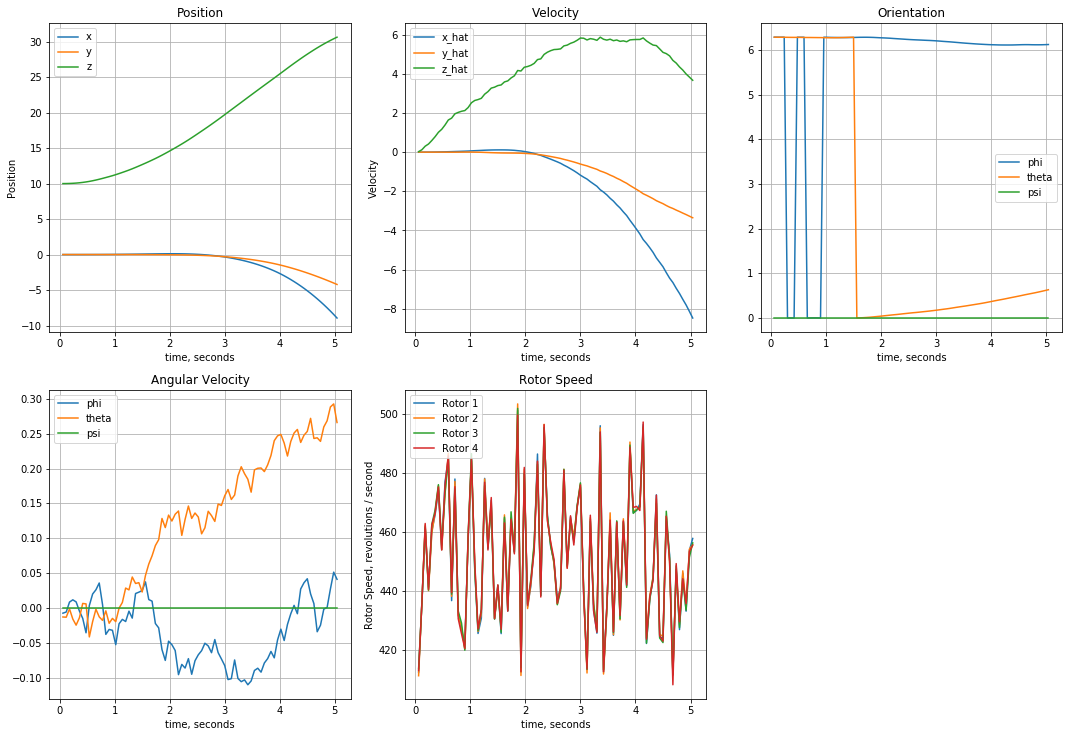

In [9]:
plot_run(results)

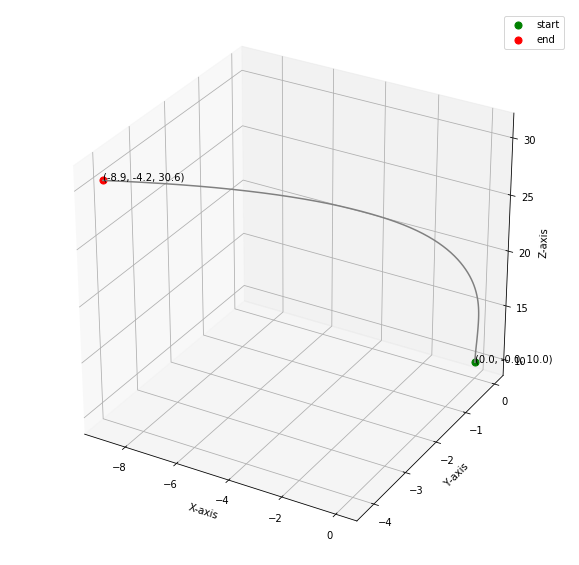

In [10]:
path = [[results['x'][i], results['y'][i], results['z'][i]] for i in range(len(results['x']))]
show_flight_path(path, target=None)

在指定任务之前，你需要在模拟器中衍生环境状态。运行下方代码来在模拟结束时输出以下变量值：

- `task.sim.pose`：四周飞行器在 ($x,y,z$) 坐标系中的位置和欧拉角。
- `task.sim.v`：四轴飞行器在 ($x,y,z$) 坐标系中的速度。
- `task.sim.angular_v`：三个欧拉角的弧度/每秒。

In [11]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ -8.94647571  -4.21627437  30.63122968   6.11877242   0.63257794   0.        ]
[-8.47221263 -3.3513112   3.66977677]
[ 0.04113225  0.26593974  0.        ]


在 `task.py` 中的任务示例中，我们使用了四轴飞行器六个维度的动作来构建每个时间步的环境状态。然而，你也可以按照自己的意愿更改任务，你可以添加速度信息来扩大状态向量，也可以使用任何动作、速度和角速度的组合，并构造适用于你的任务的环境状态。

## 任务

在 `task.py` 中，我们为你提供了一个任务示例。请在新窗口中打开这个文件。

使用 `__init__()` 方法来初始化指定本任务所需的几个变量。

- 模拟器作为 `PhysicsSim` 类（来自 `physics_sim.py` 文件）的示例进行初始化。
- 受到 DDPG 论文中研究方法的启发，我们使用了重复调用动作的方法。对于智能体的每一个时间步，我们将利用 `action_repeats` 时间步来进行模拟。如果你并不熟悉这种方法，可以阅读 [DDPG 论文](https://arxiv.org/abs/1509.02971)的结论部分。
- 我们设置了状态向量中每个分量的数值。在任务示例中，我们只设置了六个维度的动作信息。为了设定向量大小（`state_size`），我们必须考虑重复的动作。
- 任务环境通常是一个四维动作空间，每个轴有一个输入（`action_size=4`）。你可以设置每个输入的最小值（`action_low`）和最大值（`action_high`）。
- 我们在文件中提供的任务示例将使智能体达到目标位置。我们将目标位置设置为一个变量。

`reset()` 方法将重置模拟器。每当阶段结束时，智能体都将调用此方法。你可以查看下方代码中的例子。

`step()` 方法是最重要的一个方法。它将接收智能体选择的动作 `rotor_speeds`，并准备好下一个状态，同时返回给智能体。接着，你将通过 `get_reward()` 计算奖励值。当超过规定时间，或是四轴飞行器到达模拟器边缘时，这一阶段将视作结束。

接下来，你将学习如何测试这个任务中智能体的性能。

## 智能体

`agents/policy_search.py` 文件中提供的智能体示例使用了非常简单的线性策略，将动作向量视作状态向量和矩阵权重的点积直接进行计算。接着，它通过添加一些高斯噪声来随机干扰参数，以产生不同的策略。根据每个阶段获得的平均奖励值（`score`），它将记录迄今为止发现的最佳参数集以及分数的变化状态，并据此调整比例因子来扩大或减少噪音。

请运行下方代码来查看任务示例中智能体的性能。

In [12]:
import sys
import pandas as p

In [25]:
from agents.policy_search import PolicySearch_Agent
from task import Task

labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

num_episodes = 1
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        if i_episode == num_episodes:
            to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
            for ii in range(len(labels)):
                results[labels[ii]].append(to_write[ii])
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =    1, score =   1.991 (best =   1.991), noise_scale = 0.05

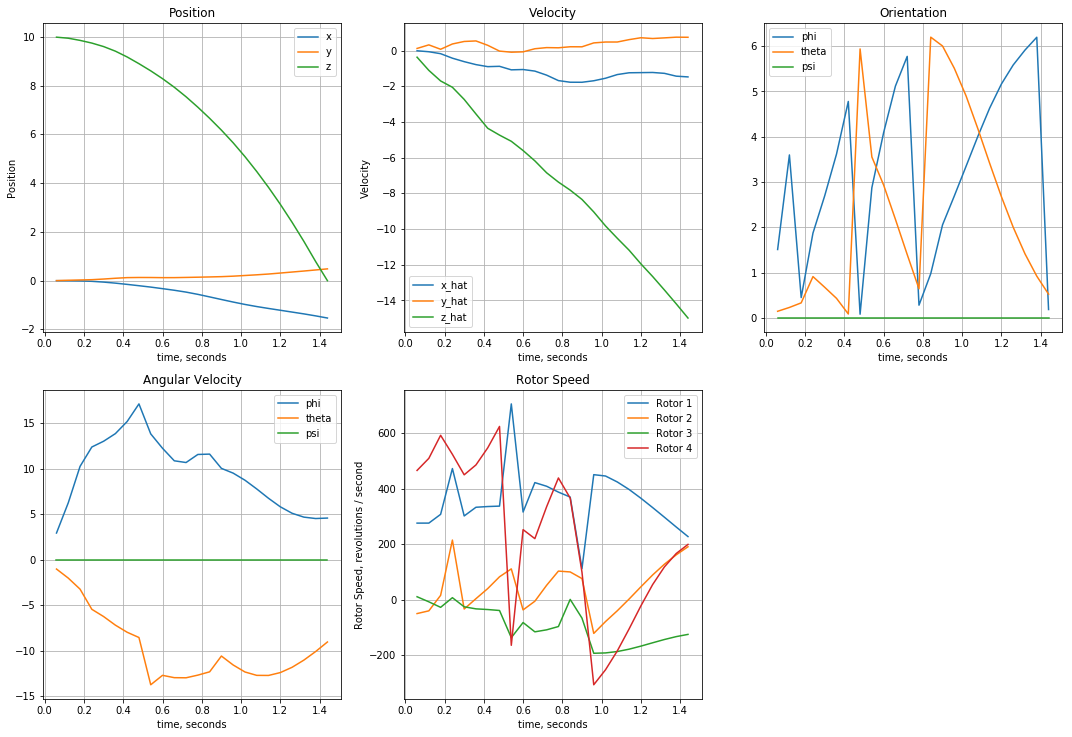

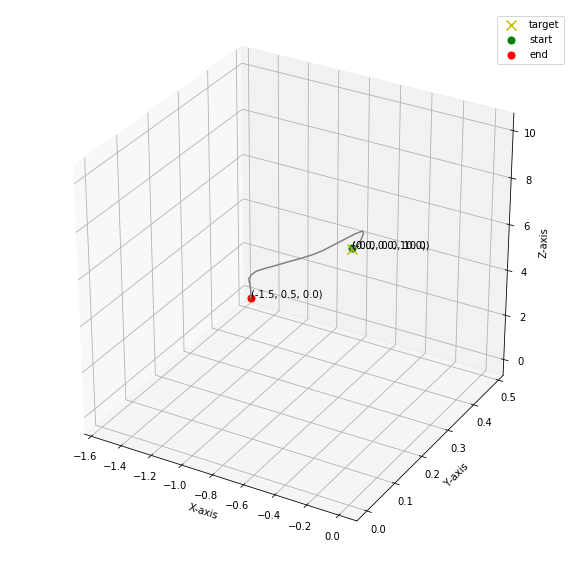

In [26]:
plot_run(results)

path = [[results['x'][i], results['y'][i], results['z'][i]] for i in range(len(results['x']))]
show_flight_path(path, target=target_pos)

这个智能体的性能想必十分糟糕！现在轮到你出场了！

## 定义任务，设计并训练你的智能体！

修改 `task.py` 文件来指定你所选择的任务。如果你不确定选择什么任务，你可以教你的四轴飞行器起飞、盘旋、着陆或是达到指定位置。


在指定任务后，使用 `agents/policy_search.py` 中的智能体示例作为模板，来在 `agents/agent.py` 中定义你自己的智能体。你可以随意从智能体示例中借用你需要的元素，包括如何模块化你的代码（使用 `act()`，`learn()` 和 `reset_episode_vars()` 等辅助方法）。

请注意，你指定的第一个智能体和任务**极有可能**无法顺利进行学习。你将需要改进不同的超参数和奖励函数，直到你能够获得不错的结果。

在开发智能体的时候，你还需要关注它的性能。参考下方代码，建立一个机制来存储每个阶段的总奖励值。如果阶段奖励值在逐渐上升，说明你的智能体正在学习。

In [41]:
## TODO: Train your agent here.
from task import Task
from agents.agent1 import agent1
import numpy as np
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}
init_pose = np.array([0., 0., 1., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data1.txt'                         # file name for saved results

num_episodes = 1500
target_pos = np.array([0., 0., 10.])
task = Task(init_pose = init_pose,init_velocities = init_velocities,init_angle_velocities = init_angle_velocities,target_pos=target_pos)
agent = agent1(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    total_reward = 0 
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action = action ,reward = reward,next_state = next_state, done=done)
        total_reward += reward
        state = next_state
        if i_episode == num_episodes:
            to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
            for ii in range(len(labels)):
                results[labels[ii]].append(to_write[ii])        
        if done:
            
            print('Episode: {}'.format(i_episode),
            'Total reward: {}'.format(total_reward))
            break
    sys.stdout.flush()


Episode: 1 Total reward: -259.93479898773364
Episode: 2 Total reward: -111.3300411828373
Episode: 3 Total reward: -98.65093673880912
Episode: 4 Total reward: -45.03274937786309
Episode: 5 Total reward: -38.75872855709209
Episode: 6 Total reward: -45.656499878489086
Episode: 7 Total reward: -47.20505241204242
Episode: 8 Total reward: -56.73183518304996
Episode: 9 Total reward: -52.18919365591187
Episode: 10 Total reward: -38.79413555616612
Episode: 11 Total reward: -39.347117574845626
Episode: 12 Total reward: -96.17958752742425
Episode: 13 Total reward: -88.96537609703908
Episode: 14 Total reward: -40.1440288913272
Episode: 15 Total reward: -74.38212257240511
Episode: 16 Total reward: -64.07135892886696
Episode: 17 Total reward: -42.41845366096385
Episode: 18 Total reward: -51.96837658781052
Episode: 19 Total reward: -50.961557196062365
Episode: 20 Total reward: -58.65032278523207
Episode: 21 Total reward: -45.087479455172485
Episode: 22 Total reward: -1591.2811088346582
Episode: 23 To

Episode: 181 Total reward: -43.505557523026994
Episode: 182 Total reward: -43.5179126783644
Episode: 183 Total reward: -49.76111604782747
Episode: 184 Total reward: -43.66855548712877
Episode: 185 Total reward: -43.592844211810686
Episode: 186 Total reward: -44.169728126766294
Episode: 187 Total reward: -49.75197246717302
Episode: 188 Total reward: -49.666591233328035
Episode: 189 Total reward: -43.52080427078556
Episode: 190 Total reward: -52.30843774793424
Episode: 191 Total reward: -44.47979798838131
Episode: 192 Total reward: -39.5983888588167
Episode: 193 Total reward: -43.51211262778317
Episode: 194 Total reward: -43.64321090535648
Episode: 195 Total reward: -44.08098407639116
Episode: 196 Total reward: -43.51841201084806
Episode: 197 Total reward: -49.82392063227338
Episode: 198 Total reward: -49.74548578625928
Episode: 199 Total reward: -49.507039738599175
Episode: 200 Total reward: -38.02815152420013
Episode: 201 Total reward: -49.82718174575595
Episode: 202 Total reward: -49.

Episode: 359 Total reward: -45.0878794253756
Episode: 360 Total reward: -44.12296808251534
Episode: 361 Total reward: -44.395416103705
Episode: 362 Total reward: -55.790684081867845
Episode: 363 Total reward: -49.8512034938478
Episode: 364 Total reward: -49.84927082851144
Episode: 365 Total reward: -49.84635141743849
Episode: 366 Total reward: -49.85742393862967
Episode: 367 Total reward: -49.85962885121937
Episode: 368 Total reward: -49.86609280738746
Episode: 369 Total reward: -49.826736686404104
Episode: 370 Total reward: -49.80629414973262
Episode: 371 Total reward: -49.86858367529299
Episode: 372 Total reward: -55.62772452498713
Episode: 373 Total reward: -56.34267263646502
Episode: 374 Total reward: -49.56595626334339
Episode: 375 Total reward: -43.782793119464586
Episode: 376 Total reward: -44.34887030071114
Episode: 377 Total reward: -39.2122788925695
Episode: 378 Total reward: -38.77811020638229
Episode: 379 Total reward: -43.553543296522555
Episode: 380 Total reward: -49.7995

Episode: 537 Total reward: -39.32333252651771
Episode: 538 Total reward: -44.801455069300594
Episode: 539 Total reward: -45.4125288225068
Episode: 540 Total reward: -57.2960534981902
Episode: 541 Total reward: -63.30745727110619
Episode: 542 Total reward: -63.09284956083597
Episode: 543 Total reward: -50.694523389398455
Episode: 544 Total reward: -38.31616228247194
Episode: 545 Total reward: -62.783282684545256
Episode: 546 Total reward: -62.50114455449868
Episode: 547 Total reward: -50.45311594787872
Episode: 548 Total reward: -64.06766638635415
Episode: 549 Total reward: -64.55389805480775
Episode: 550 Total reward: -52.18408097541556
Episode: 551 Total reward: -55.69570650649726
Episode: 552 Total reward: -88.82266635691079
Episode: 553 Total reward: -72.3864161829727
Episode: 554 Total reward: -72.29748735302195
Episode: 555 Total reward: -72.33327136965774
Episode: 556 Total reward: -72.31487736006878
Episode: 557 Total reward: -72.40135560769889
Episode: 558 Total reward: -72.255

Episode: 715 Total reward: -39.921856023015735
Episode: 716 Total reward: -39.93736388508053
Episode: 717 Total reward: -39.94108910492815
Episode: 718 Total reward: -39.928289351751324
Episode: 719 Total reward: -39.93279677676425
Episode: 720 Total reward: -39.91886429879946
Episode: 721 Total reward: -39.9363781662111
Episode: 722 Total reward: -39.9467009282779
Episode: 723 Total reward: -39.94489645851146
Episode: 724 Total reward: -39.94620898258759
Episode: 725 Total reward: -39.94667159701606
Episode: 726 Total reward: -39.95923404152209
Episode: 727 Total reward: -39.932865687454374
Episode: 728 Total reward: -39.94902481998366
Episode: 729 Total reward: -39.920424438206744
Episode: 730 Total reward: -39.980707326793116
Episode: 731 Total reward: -39.927299710821174
Episode: 732 Total reward: -39.94859380528477
Episode: 733 Total reward: -39.93610846196772
Episode: 734 Total reward: -39.93060574820573
Episode: 735 Total reward: -39.93664833066591
Episode: 736 Total reward: -39

Episode: 893 Total reward: -51.2611398271174
Episode: 894 Total reward: -51.25101720259157
Episode: 895 Total reward: -51.243051966572565
Episode: 896 Total reward: -51.261017464654124
Episode: 897 Total reward: -51.22280973394302
Episode: 898 Total reward: -51.23490626531649
Episode: 899 Total reward: -51.27214396544222
Episode: 900 Total reward: -51.11661512965829
Episode: 901 Total reward: -51.159745387563284
Episode: 902 Total reward: -51.15811581269409
Episode: 903 Total reward: -51.12928403148865
Episode: 904 Total reward: -51.14587988505384
Episode: 905 Total reward: -51.145763606881346
Episode: 906 Total reward: -57.235659250765906
Episode: 907 Total reward: -50.85914798058104
Episode: 908 Total reward: -51.63589379282362
Episode: 909 Total reward: -39.91720725286667
Episode: 910 Total reward: -45.37614042415383
Episode: 911 Total reward: -45.371995509152796
Episode: 912 Total reward: -51.86590375525407
Episode: 913 Total reward: -39.54179101678736
Episode: 914 Total reward: -3

Episode: 1069 Total reward: -43.65333617520598
Episode: 1070 Total reward: -43.653427752613936
Episode: 1071 Total reward: -43.646746104648415
Episode: 1072 Total reward: -43.65338199826792
Episode: 1073 Total reward: -43.65326969106413
Episode: 1074 Total reward: -43.65341200958339
Episode: 1075 Total reward: -44.15674476243536
Episode: 1076 Total reward: -43.658524954771316
Episode: 1077 Total reward: -43.692354302300835
Episode: 1078 Total reward: -43.653427503044284
Episode: 1079 Total reward: -43.65789123083418
Episode: 1080 Total reward: -44.7056445038654
Episode: 1081 Total reward: -43.65781836327604
Episode: 1082 Total reward: -43.65342449118765
Episode: 1083 Total reward: -44.68660438533223
Episode: 1084 Total reward: -43.65341049771435
Episode: 1085 Total reward: -44.145923826307126
Episode: 1086 Total reward: -43.65339625845591
Episode: 1087 Total reward: -43.64957540546094
Episode: 1088 Total reward: -43.653194343145884
Episode: 1089 Total reward: -43.65197384691752
Episode

Episode: 1243 Total reward: -1766.6464648969477
Episode: 1244 Total reward: -1864.08453329083
Episode: 1245 Total reward: -1958.4644145848556
Episode: 1246 Total reward: -1757.6048983796459
Episode: 1247 Total reward: -1805.1984849371638
Episode: 1248 Total reward: -1916.5556015484883
Episode: 1249 Total reward: -1702.2634789874207
Episode: 1250 Total reward: -1948.5423859977466
Episode: 1251 Total reward: -1810.171836498387
Episode: 1252 Total reward: -1783.5123383045038
Episode: 1253 Total reward: -2054.526157670846
Episode: 1254 Total reward: -2051.6110838331874
Episode: 1255 Total reward: -1950.515202755109
Episode: 1256 Total reward: -1962.9538989098694
Episode: 1257 Total reward: -1758.7050267714103
Episode: 1258 Total reward: -1731.385882425135
Episode: 1259 Total reward: -1938.7932306061555
Episode: 1260 Total reward: -1674.6221963367993
Episode: 1261 Total reward: -1708.554304274229
Episode: 1262 Total reward: -1765.6530190625663
Episode: 1263 Total reward: -1723.7823100100918

Episode: 1415 Total reward: -1870.8161479054463
Episode: 1416 Total reward: -1827.8953763269558
Episode: 1417 Total reward: -1948.1860627467552
Episode: 1418 Total reward: -1784.709140119241
Episode: 1419 Total reward: -1729.8319071497085
Episode: 1420 Total reward: -2304.6488705422166
Episode: 1421 Total reward: -1949.5894159892978
Episode: 1422 Total reward: -2046.5125400496458
Episode: 1423 Total reward: -1932.9962588294732
Episode: 1424 Total reward: -1852.4345518658338
Episode: 1425 Total reward: -1968.0002746328926
Episode: 1426 Total reward: -1783.6065167967654
Episode: 1427 Total reward: -1913.3242668262376
Episode: 1428 Total reward: -1700.2276323058447
Episode: 1429 Total reward: -1814.754320562447
Episode: 1430 Total reward: -1856.3763116745065
Episode: 1431 Total reward: -1763.7792907038952
Episode: 1432 Total reward: -2017.8303192185726
Episode: 1433 Total reward: -1832.3389885865915
Episode: 1434 Total reward: -2048.4676357270555
Episode: 1435 Total reward: -1879.73902418

## 绘制阶段奖励

请绘制智能体在每个阶段中获得的总奖励，这可以是单次运行的奖励值，也可以是多次运行的平均值。

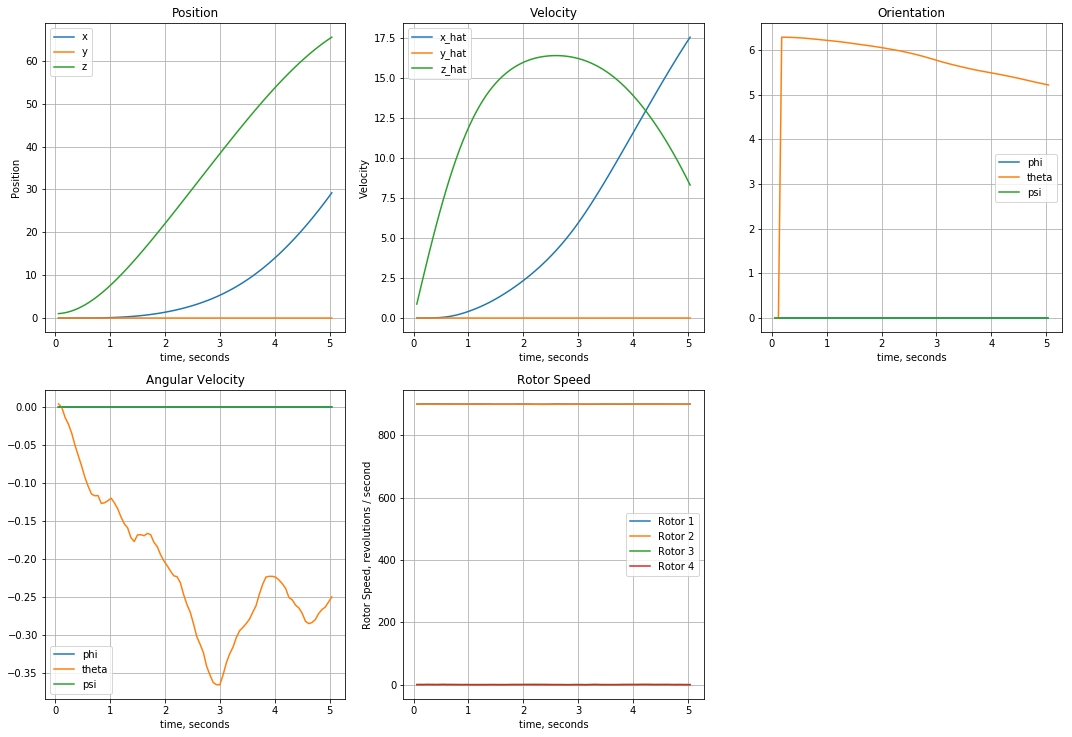

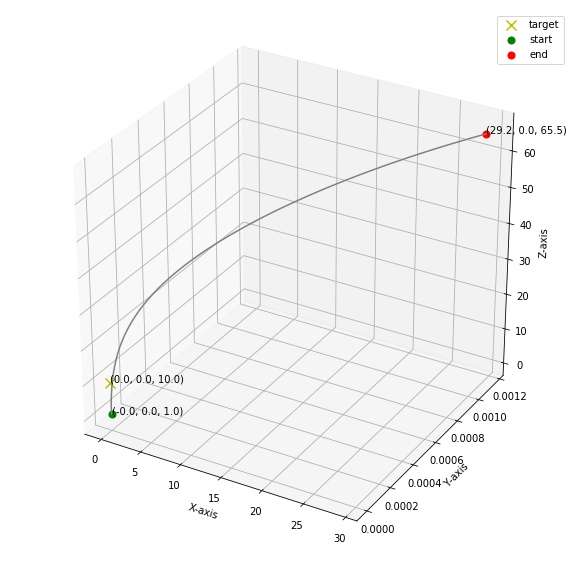

In [42]:
## TODO: Plot the rewards.
plot_run(results)

path = [[results['x'][i], results['y'][i], results['z'][i]] for i in range(len(results['x']))]
show_flight_path(path, target=target_pos)



## 回顾

**问题 1**：请描述你在 `task.py` 中指定的任务。你如何设计奖励函数？

**回答**：任务为从（0,0,1）出发到达点（0,0,10）.奖励函数为默认。


**问题 2**：请简要描述你的智能体，你可以参考以下问题：

- 你尝试了哪些学习算法？哪个效果最好？
- 你最终选择了哪些超参数（比如 $\alpha$，$\gamma$，$\epsilon$ 等）？
- 你使用了什么样的神经网络结构（如果有的话）？请说明层数、大小和激活函数等信息。

**回答**：



**问题 3**：根据你绘制的奖励图，描述智能体的学习状况。

- 学习该任务是简单还是困难？
- 该学习曲线中是否存在循序渐进或急速上升的部分？
- 该智能体的最终性能有多好？（比如最后十个阶段的平均奖励值）

**回答**：



**问题 4**：请简要总结你的本次项目经历。你可以参考以下问题：

- 本次项目中最困难的部分是什么？（例如开始项目、运行 ROS、绘制、特定的任务等。）
- 关于四轴飞行器和你的智能体的行为，你是否有一些有趣的发现？

**回答**：项目中最困难的部分是对飞行体的动作没有直观的感受，如果能规定动作再进行建模及算法训练效果会更好。所有任务中盘旋与最后降落的奖励较难设定，对于奖励函数的运用不到位。



### (可选)Plot Actor 及 Critic 结构
建议使用 ```from keras.utils import plot_model``` 来显示模型结构；